In [58]:
# Import libs 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [59]:
# Read dataset. While reading make date column dataframe index and parse date column as timestamp
dataframe = pd.read_csv("assignment.csv", parse_dates=['date'], index_col="date")

In [60]:
# First overview of dataset
dataframe.head(20)

,daily worker count
date,
2013-01-24,1
2013-01-25,1
2013-01-26,1
2013-01-27,2
2013-01-29,1
2013-01-31,3
2013-01-02,4
2013-03-02,2
2013-04-02,5


## As we see above. The index is not sorted. We should sort it.

In [61]:
# Sort index and assign dataframe again
dataframe = dataframe.sort_index()

In [62]:
# Let's see if dataframe index is sorted?
dataframe.head(20)

,daily worker count
date,
2013-01-02,4
2013-01-03,4
2013-01-04,5
2013-01-05,4
2013-01-06,4
2013-01-07,9
2013-01-08,22
2013-01-09,20
2013-01-10,20


In [63]:
# change column names. We don't want blanks in column names. So we replace underscores.
# create new python list for new column names
column_names = ['daily_worker_count']

In [64]:
# assign newly created column names list to dataframe columns
dataframe.columns = column_names

In [65]:
# Check if new column names is assigned
dataframe.columns

Index(['daily_worker_count'], dtype='object')

In [66]:
# Extract some new features from dataframe index(datetimeindex)
# We create three new features 
dataframe['year'] = dataframe.index.year
dataframe['day_of_month'] = dataframe.index.day
dataframe['month'] = dataframe.index.month
dataframe['day_of_week'] = dataframe.index.dayofweek
dataframe['quarter'] = dataframe.index.quarter

In [67]:
# See if new features has properly created
dataframe.head(20)

,daily_worker_count,year,day_of_month,month,day_of_week,quarter
date,,,,,,
2013-01-02,4,2013,2,1,2,1
2013-01-03,4,2013,3,1,3,1
2013-01-04,5,2013,4,1,4,1
2013-01-05,4,2013,5,1,5,1
2013-01-06,4,2013,6,1,6,1
2013-01-07,9,2013,7,1,0,1
2013-01-08,22,2013,8,1,1,1
2013-01-09,20,2013,9,1,2,1
2013-01-10,20,2013,10,1,3,1


In [68]:
# Check outliers in year, month and day
print("max month:", dataframe.month.max())
print("min month:", dataframe.month.min())
print("max year:", dataframe.year.max())
print("min year:", dataframe.year.min())
print("max day of month:", dataframe.day_of_month.max())
print("min day of month:", dataframe.day_of_month.min())
print("max day of week:", dataframe.day_of_week.max())
print("min day of week:", dataframe.day_of_week.min())

max month: 12
min month: 1
max year: 2017
min year: 2013
max day of month: 31
min day of month: 1
max day of week: 6
min day of week: 0


# Weekday distribution

In [69]:
# Let's see how data distributed along with day of week mean
dataframe.groupby('day_of_week').daily_worker_count.agg(['count','min','max','sum','mean'])

,count,min,max,sum,mean
day_of_week,,,,,
0,234,2,13750,1294577,5532.380342
1,236,1,13635,1278061,5415.512712
2,234,2,13655,1250288,5343.111111
3,237,1,13740,1290215,5443.945148
4,236,1,13584,1284432,5442.508475
5,236,1,13806,1037281,4395.258475
6,234,2,13688,999648,4272.000000


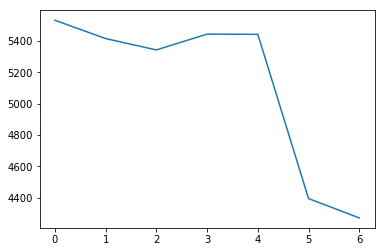

In [70]:
plt.plot(dataframe.groupby('day_of_week').daily_worker_count.mean())
plt.show()

In [71]:
# Distribution of work days seems balanced saturday and sunday average worker count is less than work days. 
# and sunday is also less than saturday

# Monthly distribution

In [72]:
# Let's see how data distributed along with month of year
dataframe.groupby('month').daily_worker_count.agg(['count','min','max','sum','mean'])

,count,min,max,sum,mean
month,,,,,
1,136,1,13471,749853,5513.625000
2,134,2,13283,701259,5233.276119
3,149,2,13689,804156,5397.020134
4,144,2,13688,756928,5256.444444
5,149,2,13559,738969,4959.523490
6,144,2,13617,740834,5144.680556
7,149,3,13500,767781,5152.892617
8,130,3,13292,628745,4836.500000
9,126,4,13740,633937,5031.246032


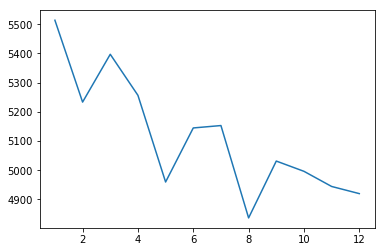

In [73]:
plt.plot(dataframe.groupby('month').daily_worker_count.mean())
plt.show()

# Quarterly Distribution

In [74]:
# Let's see how data distributed along with quarter
dataframe.groupby('quarter').daily_worker_count.agg(['count','min','max','sum','mean'])

,count,min,max,sum,mean
quarter,,,,,
1,419,1,13689,2255268,5382.501193
2,437,2,13688,2236731,5118.377574
3,405,3,13740,2030463,5013.488889
4,386,2,13806,1912040,4953.471503


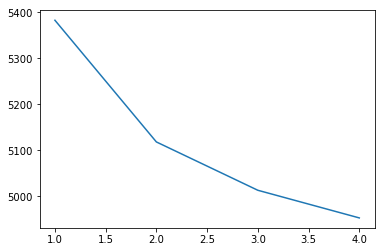

In [75]:
plt.plot(dataframe.groupby('quarter').daily_worker_count.mean())
plt.show()

# Yearly Distribution

In [76]:
# Let's see how data distributed along with year
dataframe.groupby('year').daily_worker_count.agg(['count','min','max','sum','mean'])

,count,min,max,sum,mean
year,,,,,
2013,339,1,58,6249,18.433628
2014,365,13,82,15145,41.493151
2015,365,4601,8528,2498773,6845.953425
2016,366,5497,13806,3876005,10590.177596
2017,212,6594,13526,2038330,9614.764151


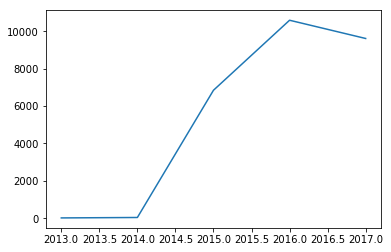

In [77]:
plt.plot(dataframe.groupby('year').daily_worker_count.mean())
plt.show()

In [78]:
dataframe.head()

,daily_worker_count,year,day_of_month,month,day_of_week,quarter
date,,,,,,
2013-01-02,4,2013,2,1,2,1
2013-01-03,4,2013,3,1,3,1
2013-01-04,5,2013,4,1,4,1
2013-01-05,4,2013,5,1,5,1
2013-01-06,4,2013,6,1,6,1


In [79]:
dataframe['2013-01-01':'2013-01-31']

,daily_worker_count,year,day_of_month,month,day_of_week,quarter
date,,,,,,
2013-01-02,4,2013,2,1,2,1
2013-01-03,4,2013,3,1,3,1
2013-01-04,5,2013,4,1,4,1
2013-01-05,4,2013,5,1,5,1
2013-01-06,4,2013,6,1,6,1
2013-01-07,9,2013,7,1,0,1
2013-01-08,22,2013,8,1,1,1
2013-01-09,20,2013,9,1,2,1
2013-01-10,20,2013,10,1,3,1


In [80]:
sf = dataframe.groupby(['year','month']).daily_worker_count.sum()

In [81]:
newdf = pd.DataFrame({'yearmonth':sf.index, 'deger':sf.values})

In [82]:
newdf.yearmonth = newdf.yearmonth.astype("str")

In [83]:
newdf.yearmonth = newdf.yearmonth.str.replace('(','').str.replace(')','').str.replace(',','').str.replace(' ','')

In [84]:
newdf.head()

,deger,yearmonth
0,151,20131
1,257,20132
2,283,20133
3,320,20134
4,320,20135


In [85]:
newdf.index = newdf.yearmonth

In [86]:
newdf.drop('yearmonth', axis=1, inplace=True)

In [87]:
newdf.head(12)

,deger
yearmonth,
20131,151
20132,257
20133,283
20134,320
20135,320
20136,286
20137,778
20138,799
20139,725


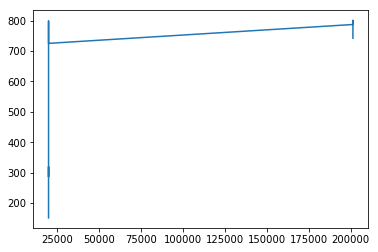

In [88]:
plt.plot(newdf['20131':'201312'])